## STA 141B 
### Homework 4

### Your Name: Xing Yang Lan  

### SID: 915113655  

Submit a zip of the folder containing your edits to the following files: this file (hw4.ipynb), hw4_viz.html, and any other files required to view hw4_viz.html (such as data).  Feel free to simply zip back up the entire folder for your submission.  Within this notebook, work in between the exercise cells and be clear about your answers.  For example, you should add cells below the cell starting with 1.1 for the answer to 1.1.  You can break your answers into as many cells as you like.  Please do not clear your output so that we can see your answers without running all of the cells.  Edit the html file directly and view with a web browser and using `python -m http.server` to check it.  You may need to debug the javascript, in which case your should use your dev tools and then look at the "console".

**Exercise 1.** We will start by web scraping the following webpage: `https://ycharts.com/indicators/sp_500_market_cap`.  Start by looking at the html (either through the dev tools for your browser or by viewing source).  We will be extracting the market cap data in the table displayed below.
![](market_cap_html.png)
You should use the `requests` package to read html and convert into a beautifulsoup object.  Find the table displayed above, using the `find_all` method.  Then print the html for this table using `print(table_found.prettify())` if `table_found` is the BeautifulSoup object corresponding to the table of interest.

Some of you may find that there is a "paywall" if you request too many times.  I realized this after writing the hw, so I have also included the html file for you in `sp_500_market_cap.html`.  If the request does not work for that reason you can read it in with the following
```
with open('sp_500_market_cap.html','r') as file_ob:
    req_text = file_ob.read()
```

In [224]:
import requests
from bs4 import BeautifulSoup

In [225]:
url = 'https://ycharts.com/indicators/sp_500_market_cap'
raw = requests.get(url)
content = raw.content

In [226]:
soup = BeautifulSoup(content, 'html.parser')

#### Using the find_all method:

In [ ]:
panels = soup.find_all('div', class_="panel panel-data")
table = panels[3]
table

#### The table is:

In [228]:
table = soup.find_all('td', class_="text-right")
table[0:50]

[<td class="text-right">
                             
                                 35.38T
                             
                         </td>, <td class="text-right">
                             
                                 33.62T
                             
                         </td>, <td class="text-right">
                             
                                 32.12T
                             
                         </td>, <td class="text-right">
                             
                                 31.31T
                             
                         </td>, <td class="text-right">
                             
                                 31.66T
                             
                         </td>, <td class="text-right">
                             
                                 30.01T
                             
                         </td>, <td class="text-right">
                             
         

**Exercise 2.** Find all of the table rows in this table that contain the market cap data.  Convert this into a pandas dataframe that contains a 'date' variable and 'market_cap' variable where 'date' is a datetime object, and 'market_cap' is a float.  Plot this timeseries using DataFrame.plot.

In [229]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [ ]:
scrap = table.prettify()
s = scrap

dates = re.findall("[A-Z].{5,18}, \d{4}", s)
mcaps = re.findall("\d{2}\.\d{2}.", s)
mcaps2 = re.findall("\d{2}\.\d{2}", s)

In [231]:
dates_ordered = []
mcaps_ordered = []
for i in range(len(dates)-1, -1,-1):
    dates_ordered.append(dates[i])
    mcaps_ordered.append(float(mcaps2[i]))


In [205]:
raw = {
    'date': dates_ordered,
    'market_cap': mcaps_ordered
}
#raw

In [206]:
df = pd.DataFrame(raw, 
                  columns=pd.Index(['date', 'market_cap']))
df[0:10]

,date,market_cap
0,"March 31, 2017",20.28
1,"April 30, 2017",20.46
2,"May 31, 2017",20.70
3,"June 30, 2017",20.76
4,"July 31, 2017",21.16
5,"August 31, 2017",21.18
6,"September 30, 2017",21.58
7,"October 31, 2017",22.06
8,"November 30, 2017",22.68
9,"December 31, 2017",22.82


In [207]:
df['date']=df['date'].str.replace(",", "")

In [208]:
counter = 4
for i in range(0, len(df['date'])):
    #print(dates[i][-9:])
    if counter % 12 != 0:
        df['date'][i] = str(counter % 12) + df['date'][i][-8:]
    else:
        df['date'][i] = '12' + df['date'][i][-8:]
    counter += 1

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [210]:
df[0:10]

,date,market_cap
0,4 31 2017,20.28
1,5 30 2017,20.46
2,6 31 2017,20.70
3,7 30 2017,20.76
4,8 31 2017,21.16
5,9 31 2017,21.18
6,10 30 2017,21.58
7,11 31 2017,22.06
8,12 30 2017,22.68
9,1 31 2017,22.82


In [211]:
for i in range(0, len(df['date'])):
    cache = df['date'][i].split(" ")
    df['date'][i] = cache[2] + "-" + cache[0] + "-" + cache[1]
df


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,market_cap
0,2017-4-31,20.28
1,2017-5-30,20.46
2,2017-6-31,20.70
3,2017-7-30,20.76
4,2017-8-31,21.16
5,2017-9-31,21.18
6,2017-10-30,21.58
7,2017-11-31,22.06
8,2017-12-30,22.68
9,2017-1-31,22.82


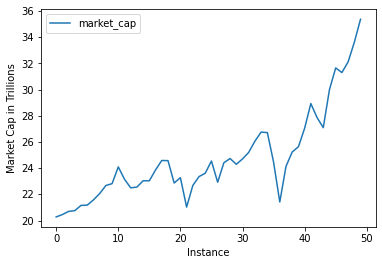

In [215]:
plotty = df.plot(y='market_cap', kind = 'line', xlabel='Instance', ylabel='Market Cap in Trillions')

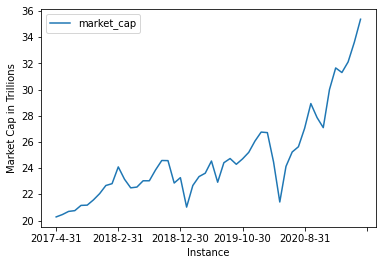

In [216]:
plotty = df.plot(x='date', y='market_cap', kind = 'line', xlabel='Instance', ylabel='Market Cap in Trillions')

**Exercise 3.** Included in this directory is the file `hw4_viz.html` which contains d3 code.  It comes from the following example: https://www.d3-graph-gallery.com/graph/line_basic.html  It is typical to just modify existing d3 code to suite your needs, so that will be what you will do here.  Do the following,
1. Export your dataframe constructed to csv and modify the `hw4_viz.html` such that this is the csv file read in.
2. Edit the following lines (in `hw4_viz.html`) so that they will use the right variable names...
```
  function(d){                                                                                                                              
    return { date : d3.timeParse("%Y-%m-%d")(d.date), value : d.value }                                                                     
  },
```
3. Edit the following lines so that the y domain starts at the minimum value for the market_cap variable.
```
    var y = d3.scaleLinear()                                                                                                                
      .domain([0, d3.max(data, function(d) { return +d.value; })])                                                                          
      .range([ height, 0 ]);                                                                                                                
```
4. For the path tag defined in the following lines,
```
    svg.append("path")                                                                                                                      
      .datum(data)                                                                                                                          
      .attr("fill", "none")                                                                                                                 
      .attr("stroke", "steelblue")                                                                                                          
      .attr("stroke-width", 1.5)                                                                                                            
      .attr("d", d3.line()                                                                                                                  
        .x(function(d) { return x(d.date) })                                                                                                
        .y(function(d) { return y(d.value) })                                                                                               
        )   
```
add an 'opacity' attribute which is set to '0.5'.
At this point when you view the `hw4_viz.html` in the browser (from `python -m http.server`) then you should see the following,
![](market_cap.png)

5. (bonus +15 points) Make it so that when you mouse over the line it sets the opacity of the path to '1' and then when you mouse out it sets the opacity back to '0.5'.  This should use the .on() method with the 'mouseover' and 'mouseout' functions.  Recall the `d3.select(this)` idiom.

#### 1. Export your dataframe constructed to csv and modify the hw4_viz.html such that this is the csv file read in.

In [105]:
df.to_csv(r'market_capA.csv')